In [1]:
%matplotlib inline

In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import time

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-90, high=90, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# 6.2.6 Get the City Weather Data

## Import Dependencies, and Initialize an Empty List and Counters

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


## Loop Through the List of Cities and Build the City URL

In [17]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [47]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 34 of Set 25 | cape town
Processing Record 35 of Set 25 | touros
Processing Record 36 of Set 25 | codrington
Processing Record 37 of Set 25 | itarema
Processing Record 38 of Set 25 | ponta do sol
Processing Record 39 of Set 25 | brae
Processing Record 40 of Set 25 | bam
Processing Record 41 of Set 25 | torbay
Processing Record 42 of Set 25 | warrington
Processing Record 43 of Set 25 | baglung
Processing Record 44 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 25 | jamestown
Processing Record 46 of Set 25 | tsaratanana
Processing Record 47 of Set 25 | zhanaozen
Processing Record 48 of Set 25 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 50 of Set 25 | bikaner
Processing Record 51 of Set 25 | belushya guba
City not found. Skipping...
Processing Record 52 of Set 25 | kedrovyy
Processing Record 53 of Set 25 | magadi
Processing Record 54 of Set 25 | abha
P

Processing Record 35 of Set 28 | paamiut
Processing Record 36 of Set 28 | thespiai
City not found. Skipping...
Processing Record 37 of Set 28 | dalbandin
Processing Record 38 of Set 28 | ilulissat
Processing Record 39 of Set 28 | baherden
Processing Record 40 of Set 28 | jacksonville
Processing Record 41 of Set 28 | hobyo
Processing Record 42 of Set 28 | abu samrah
Processing Record 43 of Set 28 | kavaratti
Processing Record 44 of Set 28 | iqaluit
Processing Record 45 of Set 28 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 28 | lasa
Processing Record 47 of Set 28 | scarborough
Processing Record 48 of Set 28 | mporokoso
Processing Record 49 of Set 28 | remanso
Processing Record 50 of Set 28 | saint-augustin
Processing Record 1 of Set 29 | klaksvik
Processing Record 2 of Set 29 | sarh
Processing Record 3 of Set 29 | bonavista
Processing Record 4 of Set 29 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 29 | prieska
Processing Record 6 of Se

Processing Record 22 of Set 32 | victoria
Processing Record 23 of Set 32 | dinsor
City not found. Skipping...
Processing Record 24 of Set 32 | veraval
Processing Record 25 of Set 32 | mwense
Processing Record 26 of Set 32 | pridonskoy
Processing Record 27 of Set 32 | lukovetskiy
Processing Record 28 of Set 32 | kuche
City not found. Skipping...
Processing Record 29 of Set 32 | henties bay
Processing Record 30 of Set 32 | pontes e lacerda
Processing Record 31 of Set 32 | velsk
Processing Record 32 of Set 32 | kalmar
Processing Record 33 of Set 32 | harper
Processing Record 34 of Set 32 | briancon
Processing Record 35 of Set 32 | lagoa
Processing Record 36 of Set 32 | lucapa
Processing Record 37 of Set 32 | kapuskasing
Processing Record 38 of Set 32 | umba
Processing Record 39 of Set 32 | mansa
Processing Record 40 of Set 32 | gamba
Processing Record 41 of Set 32 | pervomayskoye
Processing Record 42 of Set 32 | brcko
Processing Record 43 of Set 32 | dianopolis
City not found. Skipping...

City not found. Skipping...
Processing Record 7 of Set 36 | teknaf
Processing Record 8 of Set 36 | kabalo
Processing Record 9 of Set 36 | blagoyevo
Processing Record 10 of Set 36 | bengkulu
Processing Record 11 of Set 36 | palora
Processing Record 12 of Set 36 | havelock
Processing Record 13 of Set 36 | sembe
Processing Record 14 of Set 36 | tillabery
City not found. Skipping...
Processing Record 15 of Set 36 | pozo colorado
Processing Record 16 of Set 36 | cervo
Processing Record 17 of Set 36 | cravo norte
Processing Record 18 of Set 36 | kautokeino
Processing Record 19 of Set 36 | ondjiva
Processing Record 20 of Set 36 | valencia
Processing Record 21 of Set 36 | dhidhdhoo
Processing Record 22 of Set 36 | thompson
Processing Record 23 of Set 36 | umm lajj
Processing Record 24 of Set 36 | vieux fort
Processing Record 25 of Set 36 | mollendo
Processing Record 26 of Set 36 | camana
Processing Record 27 of Set 36 | kambam
Processing Record 28 of Set 36 | takoradi
Processing Record 29 of S

In [51]:
len(city_data)

1152

# 6.2.7 Create a DataFrame of City Weather Data

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,63.00,93,33,6.93,ZA,2020-05-08 04:23:39
1,Touros,-5.20,-35.46,73.40,100,20,4.70,BR,2020-05-08 04:25:58
2,Codrington,-38.27,141.97,62.13,63,33,13.13,AU,2020-05-08 04:25:00
3,Itarema,-2.92,-39.92,76.33,89,1,5.95,BR,2020-05-08 04:30:04
4,Ponta Do Sol,32.67,-17.10,60.80,77,20,3.36,PT,2020-05-08 04:25:18
5,Brae,60.40,-1.35,44.60,87,94,6.93,GB,2020-05-08 04:25:56
6,Bam,29.11,58.36,81.93,15,0,14.00,IR,2020-05-08 04:30:04
7,Torbay,47.67,-52.73,34.00,99,90,28.86,CA,2020-05-08 04:25:01
8,Warrington,53.39,-2.58,52.00,87,98,2.24,GB,2020-05-08 04:29:57
9,Baglung,28.27,83.59,78.67,26,0,4.88,NP,2020-05-08 04:30:05


In [12]:
# Re-ordering the dataframe
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-05-08 04:23:39,-33.93,18.42,63.00,93,33,6.93
1,Touros,BR,2020-05-08 04:25:58,-5.20,-35.46,73.40,100,20,4.70
2,Codrington,AU,2020-05-08 04:25:00,-38.27,141.97,62.13,63,33,13.13
3,Itarema,BR,2020-05-08 04:30:04,-2.92,-39.92,76.33,89,1,5.95
4,Ponta Do Sol,PT,2020-05-08 04:25:18,32.67,-17.10,60.80,77,20,3.36


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

## Get Data for Plotting

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

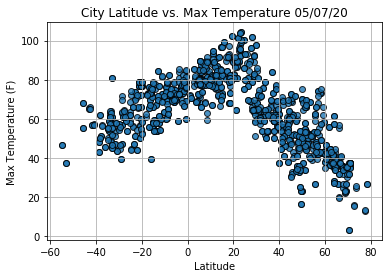

In [55]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

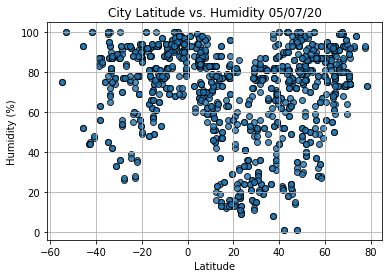

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

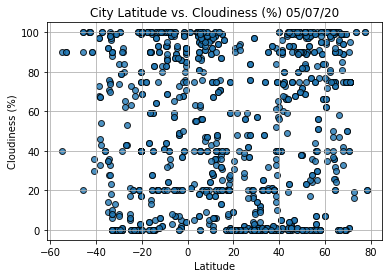

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

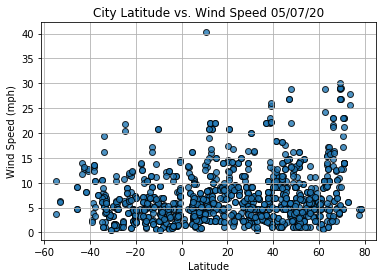

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

## Create a Linear Regression Function

In [59]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemisphere DataFrame

In [60]:
index13 = city_data_df.loc[13]
index13

City                      Bikaner
Lat                         28.02
Lng                          73.3
Max Temp                   101.95
Humidity                       16
Cloudiness                      0
Wind Speed                   9.04
Country                        IN
Date          2020-05-08 04:30:06
Name: 13, dtype: object

In [61]:
city_data_df['Lat'] >= 0

0       False
1       False
2       False
3       False
4        True
        ...  
1147     True
1148    False
1149     True
1150    False
1151     True
Name: Lat, Length: 1152, dtype: bool

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Ponta Do Sol,32.67,-17.10,60.80,77,20,3.36,PT,2020-05-08 04:25:18
5,Brae,60.40,-1.35,44.60,87,94,6.93,GB,2020-05-08 04:25:56
6,Bam,29.11,58.36,81.93,15,0,14.00,IR,2020-05-08 04:30:04
7,Torbay,47.67,-52.73,34.00,99,90,28.86,CA,2020-05-08 04:25:01
8,Warrington,53.39,-2.58,52.00,87,98,2.24,GB,2020-05-08 04:29:57
...,...,...,...,...,...,...,...,...,...
1143,Zwedru,6.07,-8.13,73.51,98,56,1.30,LR,2020-05-08 04:57:36
1145,Sinnamary,5.38,-52.95,77.79,84,99,9.78,GF,2020-05-08 04:57:36
1147,Benin,9.50,2.25,77.43,83,17,6.80,BJ,2020-05-08 04:57:36
1149,Yar-Sale,66.83,70.83,41.04,99,99,15.99,RU,2020-05-08 04:55:27


In [63]:
city_data_df[city_data_df['Lat'] >=0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Ponta Do Sol,32.67,-17.10,60.80,77,20,3.36,PT,2020-05-08 04:25:18
5,Brae,60.40,-1.35,44.60,87,94,6.93,GB,2020-05-08 04:25:56
6,Bam,29.11,58.36,81.93,15,0,14.00,IR,2020-05-08 04:30:04
7,Torbay,47.67,-52.73,34.00,99,90,28.86,CA,2020-05-08 04:25:01
8,Warrington,53.39,-2.58,52.00,87,98,2.24,GB,2020-05-08 04:29:57
...,...,...,...,...,...,...,...,...,...
1143,Zwedru,6.07,-8.13,73.51,98,56,1.30,LR,2020-05-08 04:57:36
1145,Sinnamary,5.38,-52.95,77.79,84,99,9.78,GF,2020-05-08 04:57:36
1147,Benin,9.50,2.25,77.43,83,17,6.80,BJ,2020-05-08 04:57:36
1149,Yar-Sale,66.83,70.83,41.04,99,99,15.99,RU,2020-05-08 04:55:27


In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

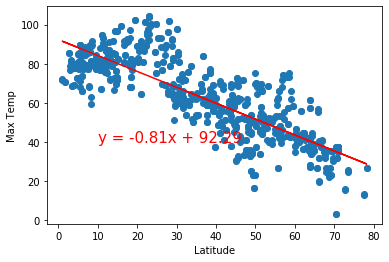

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

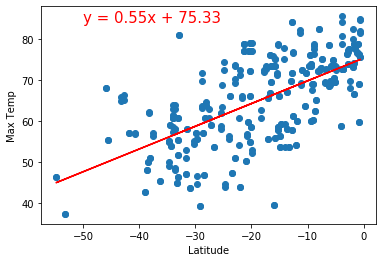

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,84))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

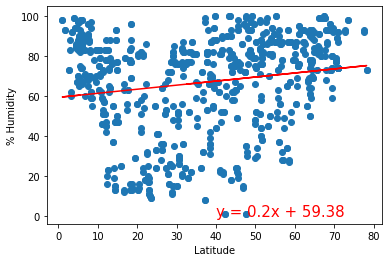

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,0))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

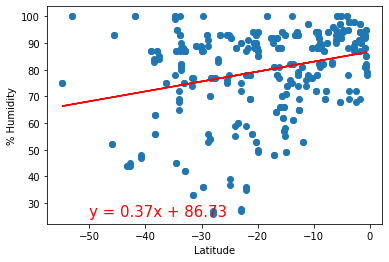

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

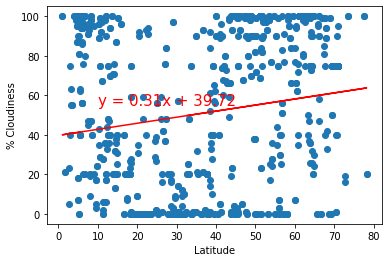

In [131]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

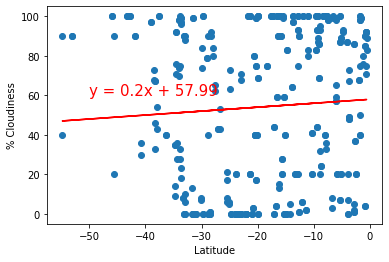

In [133]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere


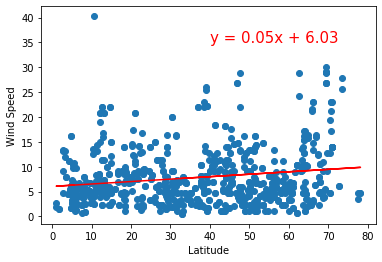

In [135]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

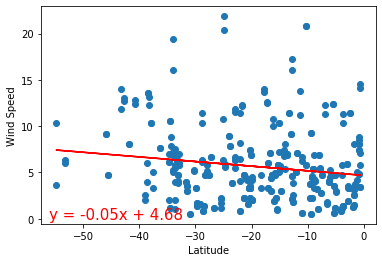

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-56,-0))